In [55]:
import pandas as pd

In [56]:
df=pd.read_csv("play.csv")

In [57]:
df

,day,outlook,temp,humidity,wind,play
0,1,sunny,hot,high,weak,no
1,2,sunny,hot,high,strong,no
2,3,overcast,hot,high,weak,yes
3,4,rain,mild,high,weak,yes
4,5,rain,cool,normal,weak,yes
5,6,rain,cool,normal,strong,no
6,7,overcast,cool,normal,strong,yes
7,8,sunny,mild,high,weak,no
8,9,sunny,cool,normal,weak,yes
9,10,rain,mild,normal,strong,yes


In [58]:
label_mapping = {
    'sunny': 0,
    'overcast': 1,
    'rain': 2,
    'hot': 0,
    'mild': 1,
    'cool': 2,
    'high': 0,
    'normal': 1,
    'weak': 0,
    'strong': 1,
    'no': 0,
    'yes': 1
}

df.replace(label_mapping, inplace=True)

In [59]:
df

,day,outlook,temp,humidity,wind,play
0,1,0,0,0,0,0
1,2,0,0,0,1,0
2,3,1,0,0,0,1
3,4,2,1,0,0,1
4,5,2,2,1,0,1
5,6,2,2,1,1,0
6,7,1,2,1,1,1
7,8,0,1,0,0,0
8,9,0,2,1,0,1
9,10,2,1,1,1,1


In [60]:
x=df.drop(['play'],axis=1)

In [61]:
y=df['play']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xtr,xtt,ytr,ytt=train_test_split(x,y,test_size=0.3)

In [64]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",random_state=0)
model.fit(xtr,ytr)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [65]:
#Decision tree classifier model
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

DecisionTreeClassifier(criterion='entropy', random_state=0)

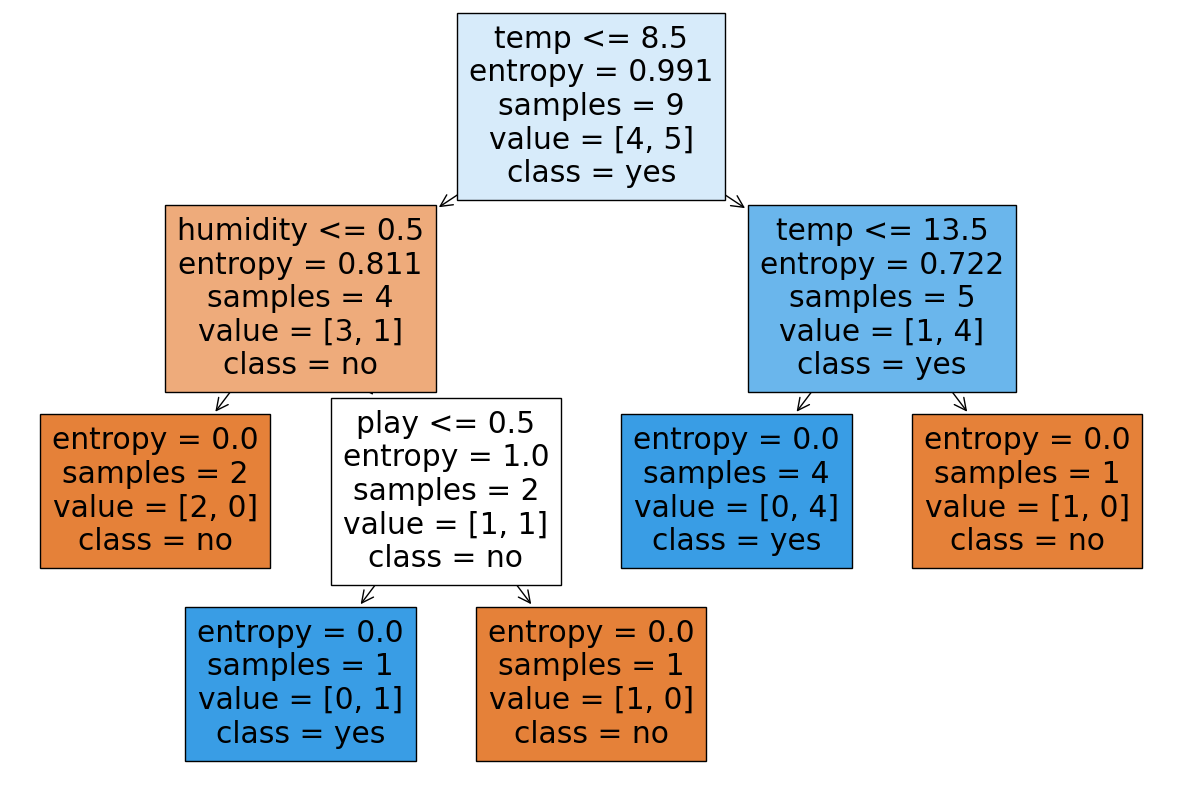

In [67]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))

# Assuming 'classifier' is your DecisionTreeClassifier instance
plot_tree(model, filled=True, feature_names=df.columns[2:], class_names=['no', 'yes'])
plt.show()

In [68]:
model.fit(xtt,ytt)
model.score(xtt,ytt)

1.0